<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

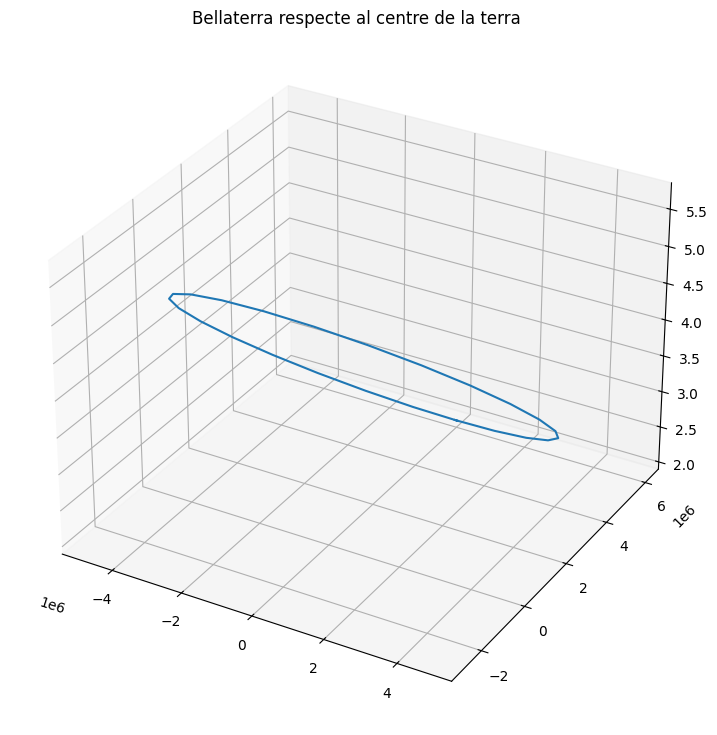

8767


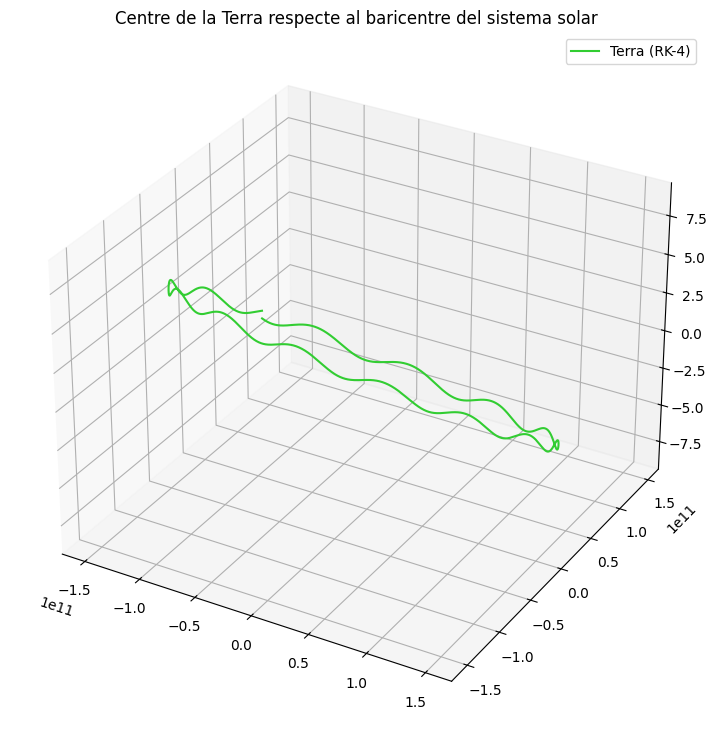

[-0.95064548 -0.92756701 -0.85925762 ... -0.74940546 -0.60713921
 -0.44146703]


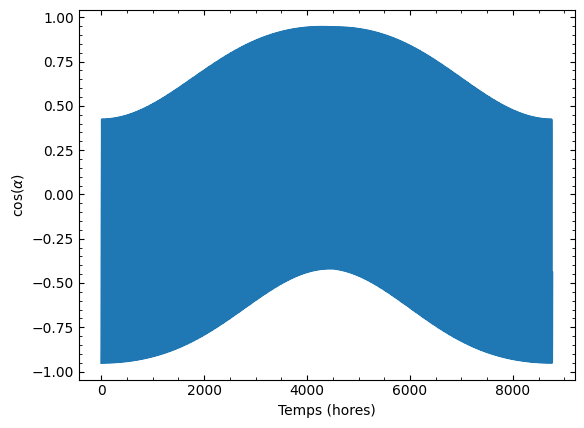

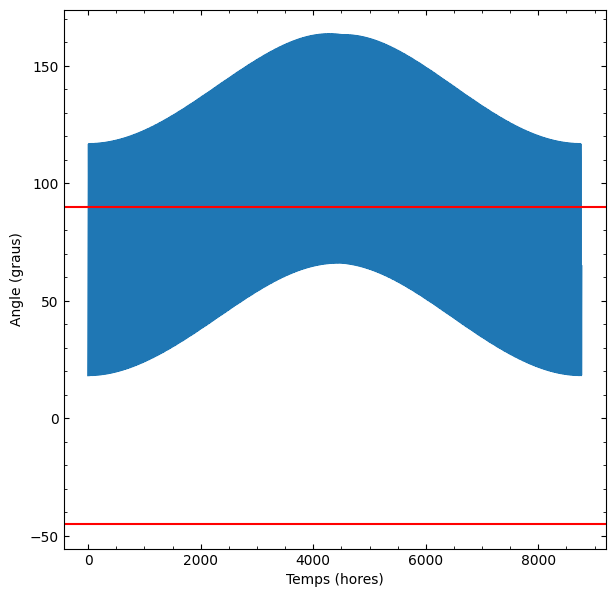

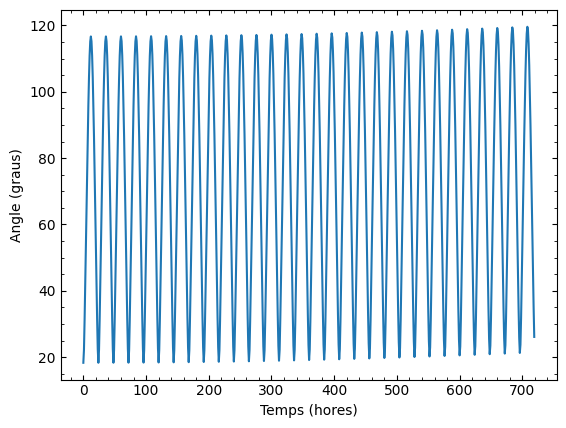

AQUI 18.327112112914484 18.327065392594164


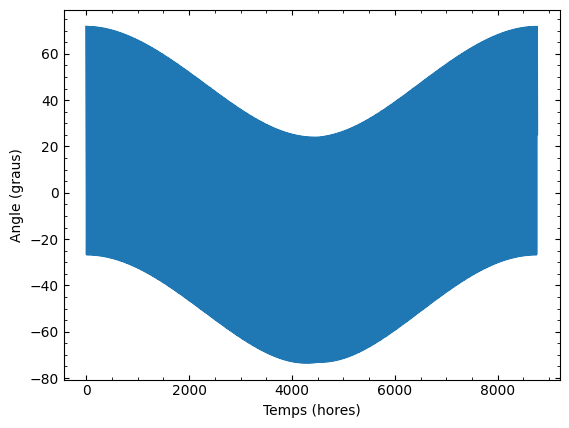

-6.008935573452902 3.6148968745845593
32.81837087302811
[0.31548669 0.38294833 0.53697968 0.72217468 0.91685334 1.11209422
 1.30255377 1.48350066 1.64953632 1.79383835 1.90786543 1.98206704
 2.0082669  1.98310103 1.90980582 1.79649385 1.65271763 1.48705099
 1.30635071 1.11603833 0.92084921 0.7260958  0.54057303 0.38552579]
8767


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23

# Condicions inicials (en cartesianes)
# L'origen és el baricentre del sistema solar
# Format: [x,y,z,vx,vy,vz]
# Inici a les 13:59 del 21 de Juny del 2025 (solstici d'estiu)
# Això és per el temps central Europeu, per tant hi ha un lleuger error
# Ja que no està a Bellaterra/Barcelona exactament
# Posicions en kilometres i velocitats en km/s

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic

def normalitza(cos):
  pos = cos[:3]*(1/r0)*10**3
  vel = cos[3:]*(t0/r0)*10**3
  return pos, vel

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart])

def acceleracions(pos, masses): # pos és una matriu de N files i 3 columnes
    N= len(masses) # Nombre de cossos: planetes, el Sol i la Lluna
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j:  # Si i ≠ j, perquè un cos no s'atrau a ell mateix
                diff= pos[j] - pos[i]
                d= np.linalg.norm(diff) # Calcula la norma del vector diferència de posicions
                acc[i]= acc[i] + masses[j] * diff / d**3
    return acc

def rk4(pos, vel, masses, h):
    K1= vel
    L1= acceleracions(pos, masses)
    K2= vel + 0.5*h*L1
    L2= acceleracions(pos + 0.5*h*K1, masses)
    K3= vel + 0.5*h*L2
    L3= acceleracions(pos + 0.5*h*K2, masses)
    K4= vel + h*L3
    L4= acceleracions(pos + h*K3, masses)
    pos_nou= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nou= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nou, vel_nou

t_f = 365
dt = 1/24
hores= int(t_f/dt)
passos = hores +6  #per tenir en compte que un any dura 365 dies i 6 hores afegim 5 + CI = 6 hores "extres" als 365 dies calculats
#AIXÒ ENS DONA L'HORA JUST ABANS DE RETORNAR A LES CONDICIONS INICIALS. SI VOLEM TROBAR EL MOMENT DEL QUE HEM PARTIT PERO UN ANY DESPRÉS HEM DE POSAR EL TEMPS SEGÜENT ÉS A DIR UN + 6

pos_hist = np.zeros((passos+1, len(masses), 3), dtype=float)
vel_hist = np.zeros((passos+1, len(masses), 3), dtype=float)
pos_hist[0] = posicions
vel_hist[0] = velocitats

for i in range(passos):
  pos_nou, vel_nou = rk4(pos_hist[i], vel_hist[i], masses, dt)
  pos_hist[i+1] = pos_nou
  vel_hist[i+1] = vel_nou

# Extreure trajectòries
idx_sol = 0
idx_terra = 1

x_t = pos_hist[:, idx_terra, 0]
y_t = pos_hist[:, idx_terra, 1]
z_t = pos_hist[:, idx_terra, 2]

x_s = pos_hist[:, idx_sol, 0]
y_s = pos_hist[:, idx_sol, 1]
z_s = pos_hist[:, idx_sol, 2]

# Volem el vector que uneix sol i terra llavors farem el vector baricentre-Terra menys el vector baricentre-Sol

R_t = 6371000 #metres
vel_ang = 2*np.pi/23.9344444 # en rad/h
theta = (23.43333333333333*2*np.pi)/360
phi= (41.505833333*2*np.pi)/360

x = np.array([0])
y = np.array([R_t*np.cos(phi-theta)])
z = np.array([R_t*np.sin(phi-theta)])

t = np.linspace(1,passos-1,passos)

# Aquestes són les coordenades del vector centre terra-bellaterra durant el temps que considerem més condicions inicials
X_b = np.concatenate((x, (-1)*R_t * np.cos(phi)*np.sin(vel_ang*t)))
Y_b = np.concatenate((y, (np.cos(phi-theta)*np.cos(vel_ang*t) + np.sin(theta)*(1-np.cos(vel_ang*t))*np.sin(phi)) * R_t))
Z_b = np.concatenate((z, (np.sin(phi-theta)*np.cos(vel_ang*t) + np.cos(theta)*(1-np.cos(vel_ang*t))*np.sin(phi)) * R_t))

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_b[:25],Y_b[:25],Z_b[:25])
ax.set_title("Bellaterra respecte al centre de la terra")
plt.tick_params(axis="both", direction ="in", top=True, right=True)
plt.show()

x_st = r0 * (x_t - x_s)
y_st = r0 * (y_t - y_s)
z_st = r0 * (z_t - z_s)


print(len(X_b))
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_st, y_st, z_st, label="Terra (RK-4)", color="limegreen")
ax.set_title("Centre de la Terra respecte al baricentre del sistema solar")
plt.tick_params(axis="both", direction ="in", top=True, right=True)
plt.legend()
plt.show()

mod_t = np.sqrt(x_st**2 + y_st**2 + z_st**2)
Mod_b = np.sqrt(X_b**2 + Y_b**2 + Z_b**2)


cos_llista = (X_b * x_st + Y_b * y_st + Z_b * z_st)/(Mod_b * mod_t)
cos_llista = np.clip(cos_llista, -1.0, 1.0)  # Per evitar problemes numèrics degut a que farem servir la funció arcosinus

print(cos_llista)

temps = np.linspace(0,passos,passos+1)

theta_llista = np.pi - np.arccos(cos_llista) #obtenim l'angle complementari que és el que ens interessa.

plt.plot (temps,cos_llista)
plt.ylabel(r'$\cos(\alpha)$')
plt.xlabel("Temps (hores)")
plt.tick_params(axis="both", which = "both", direction ="in", top=True, right=True)
plt.minorticks_on()
plt.show()

fig = plt.figure(figsize=(7,7))
plt.plot(temps,theta_llista*365/(2*np.pi))
plt.ylabel("Angle (graus)")
plt.xlabel("Temps (hores)")
plt.axhline(90, color="r")
plt.axhline(-90/2,color="r")
plt.tick_params(axis="both", which = "both", direction ="in", top=True, right=True)
plt.minorticks_on()
plt.show()

plt.plot(np.linspace(0,719,720),theta_llista[slice(720)]*365/(2*np.pi)) #això són els primers 11 dies pq es vegi més bé les oscil·lacions
plt.ylabel("Angle (graus)")
plt.xlabel("Temps (hores)")
plt.tick_params(axis="both", which = "both", direction ="in", top=True, right=True)
plt.minorticks_on()
plt.show()

print("AQUI",theta_llista[0] *365/(2*np.pi),theta_llista[-6]*365/(2*np.pi))

plt.plot(temps,90-(theta_llista)*365/(2*np.pi))
plt.tick_params(axis="both", which = "both", direction ="in", top=True, right=True)
plt.ylabel("Angle (graus)")
plt.xlabel("Temps (hores)")
plt.minorticks_on()
plt.show()


horitzo = 90-(theta_llista)*365/(2*np.pi)
print(horitzo[16],horitzo[17]) #l'index 17 conté el primer valor positu del segon dia

print(horitzo[17+723])
#nota mental aquest producte ens dona l'angle que formen dos vectors amb el mateix origen, si ens fixem nosaltres volem el complementari a aquest, és a dir pi - angle, lol

print(theta_llista[:24])
print(len(X_b))


In [5]:
theta_llista_g = theta_llista *  360/ (2 * np.pi)
print("theta_llista_degrees calculated successfully.")
print(theta_llista_g[0:481])

theta_llista_degrees calculated successfully.
[ 18.07605578  21.94132293  30.76666939  41.3775612   52.53182664
  63.71830529  74.63083359  84.99832667  94.51146918 102.77936634
 109.31263721 113.56407599 115.06521739 113.62331922 109.42381327
 102.93151535  94.69374468  85.20174555  74.84838251  63.94428594
  52.76077339  41.60222459  30.97255334  22.08900044  18.08072714
  21.9001167   30.70606372  41.31059178  52.46344361  63.65102368
  74.56653804  84.93894207  94.45931003 102.73733044 109.28413926
 113.55245391 115.07253266 113.64926095 109.46580587 102.9859468
  94.75715599  85.27134914  74.92206702  64.02040257  52.83781561
  41.67825831  31.04364925  22.1438464   18.09265022  21.86513346
  30.65038593  41.24793441  52.39919502  63.58795564  74.50670423
  84.88439149  94.41244864 102.70110528 109.26194263 113.54749275
 115.08662228 113.68179296 109.51396235 103.04599249  94.82561957
  85.34550242  74.99989882  64.10039483  52.9186354   41.75823108
  31.1192894   22.20457433  18.

In [6]:
creuament = 0
for i in range(len(theta_llista_g) - 1):
    if (theta_llista_g[i] < 90 and theta_llista_g[i+1] > 90) or \
       (theta_llista_g[i] > 90 and theta_llista_g[i+1] < 90):
        creuament += 1

print(f"Es creua la línia blava (dia-nit o bé nit-dia) {creuament} cops. Per tant, han passat {creuament/2} dies, que correspon a 1 any.")

Es creua la línia blava (dia-nit o bé nit-dia) 730 cops. Per tant, han passat 365.0 dies, que correspon a 1 any.


In [7]:
index=[]
for i in range(len(horitzo) - 1):
    if horitzo[i] < 0 and horitzo[i+1] >= 0:
        index.append(i+1)
print(index)

[17, 41, 65, 89, 113, 137, 161, 185, 209, 233, 257, 281, 305, 329, 353, 377, 401, 425, 449, 473, 497, 521, 545, 569, 593, 617, 641, 665, 689, 714, 738, 762, 786, 810, 834, 858, 882, 906, 930, 954, 978, 1002, 1026, 1050, 1074, 1098, 1122, 1146, 1170, 1194, 1218, 1242, 1266, 1290, 1314, 1338, 1362, 1386, 1410, 1434, 1458, 1482, 1506, 1530, 1554, 1578, 1602, 1626, 1650, 1674, 1698, 1722, 1746, 1770, 1794, 1818, 1842, 1866, 1890, 1914, 1938, 1962, 1987, 2011, 2035, 2059, 2083, 2107, 2131, 2155, 2179, 2203, 2227, 2251, 2275, 2299, 2323, 2347, 2371, 2395, 2419, 2443, 2467, 2491, 2515, 2539, 2563, 2587, 2611, 2635, 2659, 2683, 2707, 2731, 2755, 2779, 2803, 2827, 2851, 2875, 2899, 2923, 2947, 2971, 2995, 3019, 3043, 3067, 3091, 3115, 3140, 3164, 3188, 3212, 3236, 3260, 3284, 3308, 3332, 3356, 3380, 3404, 3428, 3452, 3476, 3500, 3524, 3548, 3572, 3596, 3620, 3644, 3668, 3692, 3716, 3740, 3764, 3788, 3812, 3836, 3860, 3884, 3908, 3932, 3956, 3980, 4004, 4028, 4052, 4076, 4100, 4124, 4148, 4172, 

365


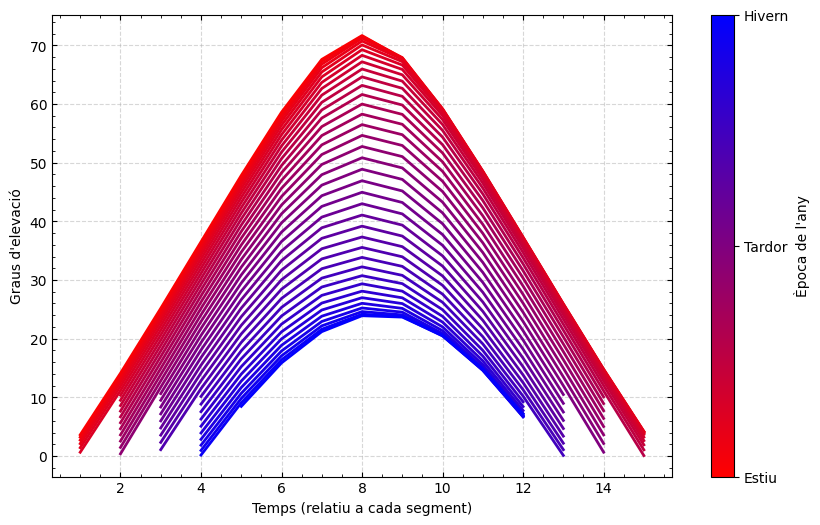

l'elevació mínima és 23.91637900225315 graus centesimals
l'elevació màxima és 71.66815165177921 graus centesimals


In [12]:
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

Colors = ["red", "purple", "blue"]
mapa = LinearSegmentedColormap.from_list("seasonal_temp_cmap", Colors, N=256)
temps_norm = plt.Normalize(vmin=0, vmax=len(temps) * 0.5)

fig1, ax1 = plt.subplots(figsize=(10,6))
valors_cum=[]
print(len(index))
for i in range(37):
  valors=[]
  j=0
  index_segment = index[5*i]
  color_segment = mapa(temps_norm(index_segment))

  while True:

    if horitzo[index[5*i]+j] < 0:

      break

    valors.append(horitzo[index[5*i]+j])
    j = j + 1
  valors_cum.append(valors)
  if valors:

    max_index = np.argmax(valors)
    inici_desplaçat = 8 - max_index
    x = np.linspace(inici_desplaçat, inici_desplaçat + len(valors) - 1, len(valors))
    ax1.plot(x, valors, color=color_segment, linewidth=2)


ax1.set_xlabel("Temps (relatiu a cada segment)")
ax1.set_ylabel("Graus d'elevació")
ax1.tick_params(axis="both", which = "both", direction ="in", top=True, right=True)
ax1.minorticks_on()


sm = ScalarMappable(cmap=mapa, norm=temps_norm)
sm.set_array([])
barra = fig1.colorbar(sm, ax=ax1)
barra.set_label("Època de l'any")


hores_t = len(temps) - 1
barra.set_ticks([0, hores_t * 0.25, hores_t * 0.5])
barra.set_ticklabels(["Estiu", "Tardor", "Hivern"])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#trobar els valors minim i maxim de tal bla bla bla
maxvalues = []
for i in valors_cum:
  maxvalues.append(max(i))

print("l'elevació mínima és", min(maxvalues),"graus centesimals")
print("l'elevació màxima és", max(maxvalues),"graus centesimals")